## Airbnb Price Prediction And reviews sentiment analysis

### Author: Apurba Pandey
### Date: 18 October 2023 

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [2]:
# Number of files
num_files = 10

# List to store dataframes
dfs = []

# Loop through each file and load it into a dataframe
for i in range(1, num_files + 1):
    df = pd.read_csv(f"data_airbnb/listings{i}.csv")
    dfs.append(df)

# Concatenate all the dataframes into a single dataframe
df_combined = pd.concat(dfs, ignore_index=True)

In [3]:
# Read the csv files
df_reviews = pd.read_csv("data_airbnb/reviews.csv")

df_short_term_rental = pd.read_csv("data_airbnb/short-term-rental.csv")

### Few dataset column Details 

- id: Unique identifier for each listing.
- listing_url: URL of the listing.
- name: Name of the listing.
- description: Description of the listing.
- neighborhood_overview: Overview of the neighborhood.
- host_id: Identifier for the host.
- host_name: Name of the host.
- host_since: The date the host joined Airbnb.
- host_response_time: Time taken by the host to respond to inquiries.
- review_scores_location: Review score based on location.
- instant_bookable: Whether the property can be booked instantly.
- reviews_per_month: Average number of reviews per month.
- bathroom_num: Number of bathrooms in the listing.

## Exploratory Data Analysis (EDA)

In [4]:
# This dataframe holds all the reviews information
df_reviews.head()

listing_id         id        date  reviewer_id reviewer_name  \
0        1419   38924112  2015-07-19     11308465       Marcela   
1        1419   44791978  2015-08-29      9580285         Marco   
2        1419   45957133  2015-09-07     38394721        Andrea   
3        1419   67295154  2016-03-28      3515044         Shaun   
4        1419  177702208  2017-08-03     13987100          Kate   

                                            comments  
0  Having the opportunity of arriving to Alexandr...  
1  We have no enough words to describe how beauty...  
2  The listing was exceptional and an even better...  
3  Alexandra's home was amazing and in such a nea...  
4  Beautiful home. Very comfortable and clean. Pe...

In [5]:
# This is dataframe that holds short term rental information
df_short_term_rental.head()

_id operator_registration_number                 address  unit  \
0  671380              STR-2211-FFDPHP  1926 Lake Shore Blvd W  1803   
1  671381              STR-2211-GBWHHR         410 Dufferin St   918   
2  671382              STR-2212-JDVBHZ           295 McKee Ave   NaN   
3  671383              STR-2212-HZDPHZ       39 Roehampton Ave  3302   
4  671384              STR-2301-GRBDVT             41 River St     2   

  postal_code               property_type  ward_number           ward_name  
0         M6S                 Condominium          4.0  Parkdale-High Park  
1         M6K                 Condominium          9.0           Davenport  
2         M2N  Single/Semi-detached House         18.0          Willowdale  
3         M4P                 Condominium         12.0  Toronto-St. Paul's  
4         M5A                 Condominium         13.0      Toronto Centre

In [6]:
# Check the shape of the reviews Dataframe
df_reviews.shape

(482676, 6)

In [7]:
# Check the shape of the listings Dataframe
df_combined.shape    # output: 199641 rows and 75 columns

(199641, 75)

In [8]:
# Check Duplicates
df_combined.duplicated().sum()

0

In [9]:
# Check Dataframe
df_combined.head()

id                          listing_url       scrape_id last_scraped  \
0    1419    https://www.airbnb.com/rooms/1419  20230903194159   2023-09-04   
1    8077    https://www.airbnb.com/rooms/8077  20230903194159   2023-09-04   
2  387077  https://www.airbnb.com/rooms/387077  20230903194159   2023-09-04   
3  864193  https://www.airbnb.com/rooms/864193  20230903194159   2023-09-04   
4   26654   https://www.airbnb.com/rooms/26654  20230903194159   2023-09-04   

            source                                               name  \
0  previous scrape  Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...   
1  previous scrape  Rental unit in Toronto · ★4.84 · 1 bedroom · 1...   
2      city scrape  Rental unit in Toronto · ★4.33 · 1 bedroom · 1...   
3  previous scrape  Rental unit in Toronto · 1 bedroom · 1 bed · 1...   
4  previous scrape  Condo in Toronto · ★4.78 · 1 bedroom · 2 beds ...   

                                         description  \
0  This large, family home is located in one of T...   
1  Guest room in a luxury condo with access to al...   
2  <b>The space</b><br />Annex House provides ful...   
3  <b>The space</b><br />It's 2 Bedrooms specious...   
4  CN Tower, TIFF Bell Lightbox, Metro Convention...   

                               neighborhood_overview  \
0  The apartment is located in the Ossington stri...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  There's a reason they call it the Entertainmen...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/76206750/d643...     1565  ...   
1  https://a0.muscache.com/pictures/11780344/141c...    22795  ...   
2  https://a0.muscache.com/pictures/miso/Hosting-...   304551  ...   
3  https://a0.muscache.com/pictures/12401176/ba30...  4534248  ...   
4  https://a0.muscache.com/pictures/81811785/5dcd...   113345  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   5.00                5.00   
1                        4.90                   4.92                4.83   
2                        4.67                   4.33                4.67   
3                         NaN                    NaN                 NaN   
4                        4.76                   4.85                4.66   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              1   
1     NaN                f                              2   
2     NaN                f                              7   
3     NaN                f                              1   
4     NaN                f                              4   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           1   
2                                           1   
3                                           0   
4                                           4   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            1   
2                                            6   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.07  
1                                           0              0.99  
2                                           0              0.02  
3                                           0               NaN  
4                                           0              0.27  

[5 rows x 75 columns]

In [10]:
# Checking duplicates with regards to listing url as this will give true duplicates in the dataset as each listing has 1 url
df_combined["listing_url"].duplicated().sum()

156752

In [11]:
# Drop the duplicates found
df_combined = df_combined.drop_duplicates(subset=['listing_url'], keep='first')

In [12]:
# Check Dataframe
df_combined  # the rows is now 42889 and 75 columns

id                                      listing_url  \
0                     1419                https://www.airbnb.com/rooms/1419   
1                     8077                https://www.airbnb.com/rooms/8077   
2                   387077              https://www.airbnb.com/rooms/387077   
3                   864193              https://www.airbnb.com/rooms/864193   
4                    26654               https://www.airbnb.com/rooms/26654   
...                    ...                                              ...   
199624  725980637220160448  https://www.airbnb.com/rooms/725980637220160448   
199631  726041097853136970  https://www.airbnb.com/rooms/726041097853136970   
199636  726266531273558466  https://www.airbnb.com/rooms/726266531273558466   
199637  726288425027155713  https://www.airbnb.com/rooms/726288425027155713   
199639  726336797069217523  https://www.airbnb.com/rooms/726336797069217523   

             scrape_id last_scraped           source  \
0       20230903194159   2023-09-04  previous scrape   
1       20230903194159   2023-09-04  previous scrape   
2       20230903194159   2023-09-04      city scrape   
3       20230903194159   2023-09-04  previous scrape   
4       20230903194159   2023-09-04  previous scrape   
...                ...          ...              ...   
199624  20221008145247   2022-10-08      city scrape   
199631  20221008145247   2022-10-09      city scrape   
199636  20221008145247   2022-10-09      city scrape   
199637  20221008145247   2022-10-09      city scrape   
199639  20221008145247   2022-10-08      city scrape   

                                                     name  \
0       Home in Toronto · ★5.0 · 5 bedrooms · 7 beds ·...   
1       Rental unit in Toronto · ★4.84 · 1 bedroom · 1...   
2       Rental unit in Toronto · ★4.33 · 1 bedroom · 1...   
3       Rental unit in Toronto · 1 bedroom · 1 bed · 1...   
4       Condo in Toronto · ★4.78 · 1 bedroom · 2 beds ...   
...                                                   ...   
199624  Cheerful & Cozy 5-bedroom house with free 5par...   
199631                   Green (Hostel) Room #1 Lower Bed   
199636                          North York Modern Mansion   
199637  Toronto Newly renovated 2BR Apt`Separate Entrance   
199639       Private room in 2nd Floor @ Downtown Toronto   

                                              description  \
0       This large, family home is located in one of T...   
1       Guest room in a luxury condo with access to al...   
2       <b>The space</b><br />Annex House provides ful...   
3       <b>The space</b><br />It's 2 Bedrooms specious...   
4       CN Tower, TIFF Bell Lightbox, Metro Convention...   
...                                                   ...   
199624  This listing is for the entire house located i...   
199631  Enjoy a memorable time at this Hostel on Grand...   
199636  This ultra modern multi million dollar home ha...   
199637  ~ Newly renovated 2 bedroom apartment.<br />~F...   
199639  Private room in 2nd Floor of share house, shar...   

                                    neighborhood_overview  \
0       The apartment is located in the Ossington stri...   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4       There's a reason they call it the Entertainmen...   
...                                                   ...   
199624                                                NaN   
199631        The Neighbourhood is very Quiet and Private   
199636  The house is located at Bayview and Shepherd i...   
199637                                                NaN   
199639                                                NaN   

                                              picture_url    host_id  ...  \
0       https://a0.muscache.com/pictures/76206750/d643...       1565  ...   
1       https://a0.muscache.com/pictures/11780344

In [13]:
df_combined.duplicated().T.sum()

0

In [14]:
# Export the combined Dataframe
df.to_csv('my_combined_data.csv', index=False)

In [15]:
#Check the df_combined information to see the different datatypes
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42889 entries, 0 to 199639
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42889 non-null  int64  
 1   listing_url                                   42889 non-null  object 
 2   scrape_id                                     42889 non-null  int64  
 3   last_scraped                                  42889 non-null  object 
 4   source                                        42889 non-null  object 
 5   name                                          42889 non-null  object 
 6   description                                   42572 non-null  object 
 7   neighborhood_overview                         15400 non-null  object 
 8   picture_url                                   42889 non-null  object 
 9   host_id                                       42889 non-null  int

In [16]:
# Check out the statistical description for the Dataframe
df_combined.describe().T

count          mean  \
id                                            42889.0  5.728640e+17   
scrape_id                                     42889.0  2.022995e+13   
host_id                                       42889.0  2.972234e+08   
host_listings_count                           42887.0  1.101712e+02   
host_total_listings_count                     42887.0  1.290810e+02   
neighbourhood_group_cleansed                      0.0           NaN   
latitude                                      42889.0  4.368030e+01   
longitude                                     42889.0 -7.939538e+01   
accommodates                                  42889.0  2.926065e+00   
bathrooms                                         0.0           NaN   
bedrooms                                      31405.0  1.527145e+00   
beds                                          42653.0  1.619206e+00   
minimum_nights                                42889.0  2.681007e+01   
maximum_nights                                42889.0  4.598656e+02   
minimum_minimum_nights                        42889.0  2.661067e+01   
maximum_minimum_nights                        42889.0  2.770592e+01   
minimum_maximum_nights                        42889.0  5.744926e+02   
maximum_maximum_nights                        42889.0  5.787422e+02   
minimum_nights_avg_ntm                        42889.0  2.704106e+01   
maximum_nights_avg_ntm                        42889.0  5.774623e+02   
calendar_updated                                  0.0           NaN   
availability_30                               42889.0  1.256143e+01   
availability_60                               42889.0  3.045811e+01   
availability_90                               42889.0  5.113633e+01   
availability_365                              42889.0  2.074268e+02   
number_of_reviews                             42889.0  1.476465e+01   
number_of_reviews_ltm                         42889.0  4.690317e+00   
number_of_reviews_l30d                        42889.0  5.629649e-01   
review_scores_rating                          20396.0  4.689155e+00   
review_scores_accuracy                        20257.0  4.757330e+00   
review_scores_cleanliness                     20259.0  4.683400e+00   
review_scores_checkin                         20255.0  4.813650e+00   
review_scores_communication                   20256.0  4.825510e+00   
review_scores_location                        20255.0  4.805025e+00   
review_scores_value                           20256.0  4.638955e+00   
calculated_host_listings_count                42889.0  1.063865e+02   
calculated_host_listings_count_entire_homes   42889.0  7.210933e+01   
calculated_host_listings_count_private_rooms  42889.0  3.421950e+01   
calculated_host_listings_count_shared_rooms   42889.0  5.705426e-02   
reviews_per_month                             20396.0  1.577771e+00   

                                                       std           min  \
id                                            4.013515e+17  1.419000e+03   
scrape_id                                     2.694144e+09  2.022101e+13   
host_id                                       2.010452e+08  1.565000e+03   
host_listings_count                           1.858635e+02  1.000000e+00   
host_total_listings_count                     2.153921e+02  1.000000e+00   
neighbourhood_group_cleansed                           NaN           NaN   
latitude                                      4.734067e-02  4.358575e+01   
longitude                                     6.481866e-02 -7.962395e+01   
accommodates                                  1.883712e+00  0.000000e+00   
bathrooms                                              NaN           NaN   
bedrooms                                      8.976417e-01  1.000000e+00   
beds                                          1.015877e+00  1.000000e+00   
minimum_nights                                3.078799e+01  1.000000e+00   
maximum_nights                                3.675014e+02  1.000000e+00

In [17]:
# Checkout the shape
df_combined.shape

(42889, 75)

### Check null values

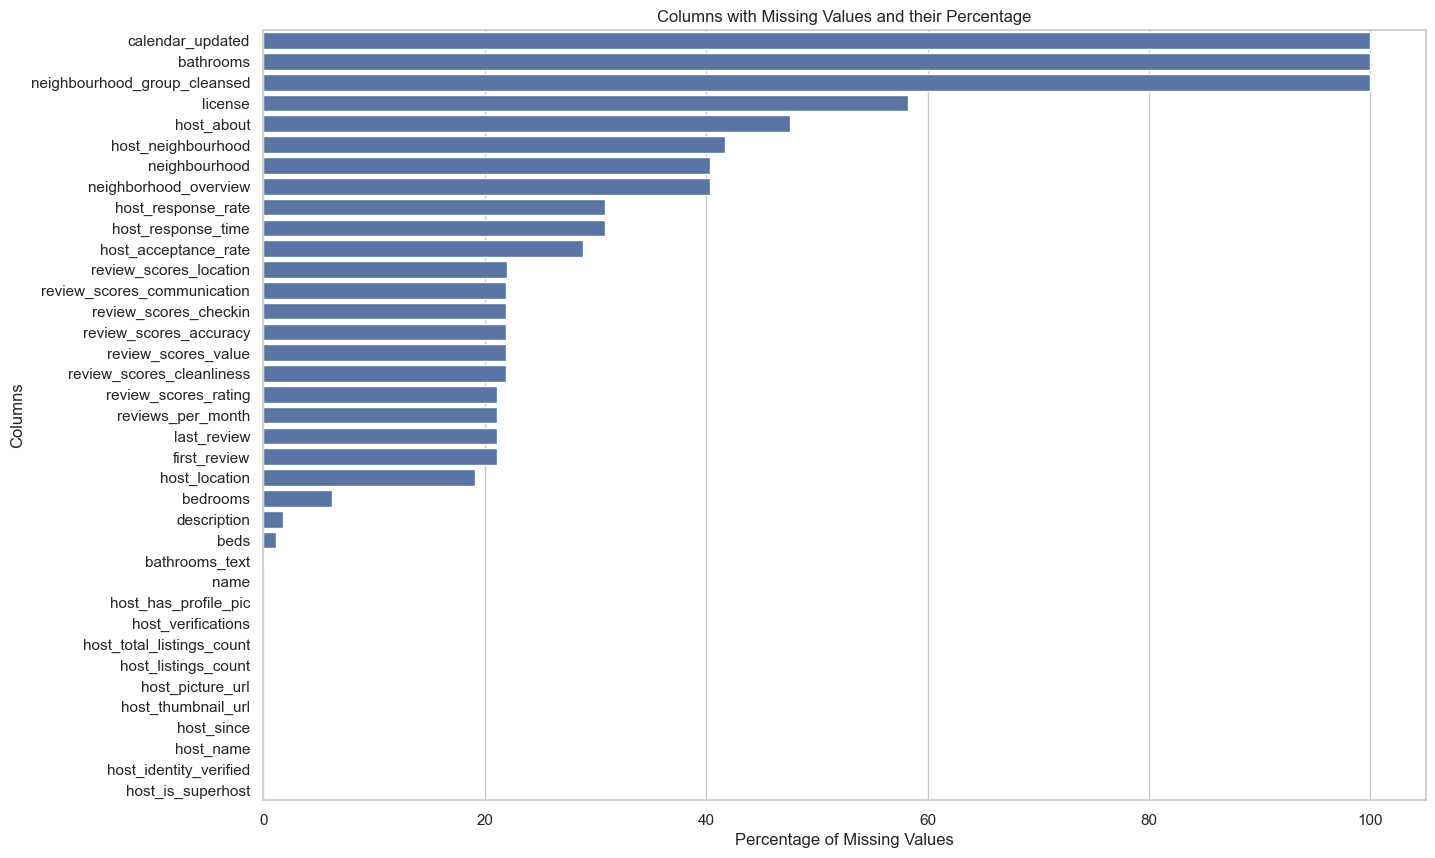

In [49]:
# Check missing values by using isnull method
missing_values = df.isnull().sum() / len(df) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plotting the missing values
plt.figure(figsize=(15, 10))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Columns with Missing Values and their Percentage")
plt.show()

We will need a way to deal with the null values by either dropping or imputing. we can drop the 100% null values right away after checking

In [18]:
# Check null for calender updated
df_combined["calendar_updated"].isnull().sum() # no values

42889

In [19]:
# Check null for bathrooms
df_combined["bathrooms"].isnull().sum() # no values

42889

In [20]:
# Check null for neighbourhood_group_cleansed
df_combined["neighbourhood_group_cleansed"].isnull().sum() # no values

42889

In [21]:
# Checkout the names of the columns
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [22]:
# Drop the columns that is not supportive in the dataset right away 
df_combined.drop(['scrape_id', 'last_scraped', 'source','picture_url',"calendar_updated",'bathrooms','neighbourhood_group_cleansed'],axis = 1, inplace = True)

In [23]:
# Check the shape
df_combined.shape  # We have now reduced the columns from 75 to 68

(42889, 68)

In [24]:
# Check Dataframe info again
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42889 entries, 0 to 199639
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42889 non-null  int64  
 1   listing_url                                   42889 non-null  object 
 2   name                                          42889 non-null  object 
 3   description                                   42572 non-null  object 
 4   neighborhood_overview                         15400 non-null  object 
 5   host_id                                       42889 non-null  int64  
 6   host_url                                      42889 non-null  object 
 7   host_name                                     42887 non-null  object 
 8   host_since                                    42887 non-null  object 
 9   host_location                                 24260 non-null  obj

### Lets convert the data types of some variables

In [50]:
# Check host since column
df_combined["host_since"].head()

0    2008-08-08
1    2009-06-22
2    2010-11-29
3    2012-12-30
4    2010-04-25
Name: host_since, dtype: object

In [51]:
# Convert host since to datetime
df_combined["host_since"] = pd.to_datetime(df_combined["host_since"]) # use pandas datetime
df_combined["host_since"].info() # it is converted to datetime

<class 'pandas.core.series.Series'>
Index: 42811 entries, 0 to 199639
Series name: host_since
Non-Null Count  Dtype         
--------------  -----         
42809 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 668.9 KB


In [25]:
# Convert the price column from string to float
df_combined["price"] = df_combined["price"].str.replace("$","") # replace $ with blank forst

In [26]:
# Convert string to float after removing $ sign
df_combined["price"] = df_combined["price"].str.replace(",","").astype('float') 

In [27]:
# Check Price column 
df_combined["price"]

0          469.0
1          102.0
2           60.0
3           88.0
4          338.0
           ...  
199624     645.0
199631      36.0
199636    2200.0
199637     139.0
199639     121.0
Name: price, Length: 42889, dtype: float64

In [28]:
# Check statistics for price column
df_combined["price"].describe()  

count     42889.000000
mean        182.290955
std         768.800200
min           0.000000
25%          85.000000
50%         120.000000
75%         192.000000
max      110114.000000
Name: price, dtype: float64

The mean and median values look fine, but the max value however does not make sense, we will look into this to findout if it is an outliar or maybe even fake listing.

In [29]:
# Check the max price listing, since this looks like alot
df_combined[df_combined["price"]== 110114.000000]  # the listing does not exist, we will remove it later.

id                            listing_url  \
156748  34706247  https://www.airbnb.com/rooms/34706247   

                                            name  \
156748  Queen West 2bdrm +2bathCondo with Views.   

                                              description  \
156748  -----<br />*Note. Even though currently listed...   

                                    neighborhood_overview  host_id  \
156748  The appartment in centered between all these g...  3578042   

                                         host_url host_name  host_since  \
156748  https://www.airbnb.com/users/show/3578042      Yian  2012-09-15   

          host_location  ... review_scores_communication  \
156748  Toronto, Canada  ...                         5.0   

       review_scores_location review_scores_value license instant_bookable  \
156748                    5.0                 5.0     NaN                f   

       calculated_host_listings_count  \
156748                              1   

       calculated_host_listings_count_entire_homes  \
156748                                           1   

       calculated_host_listings_count_private_rooms  \
156748                                            0   

        calculated_host_listings_count_shared_rooms  reviews_per_month  
156748                                            0               0.08  

[1 rows x 68 columns]

In [30]:
# since there are only 98 rows with listings more than 2000$, decided to exlcude those and see the distribution
df_combined = df_combined[df_combined["price"]<= 2000]

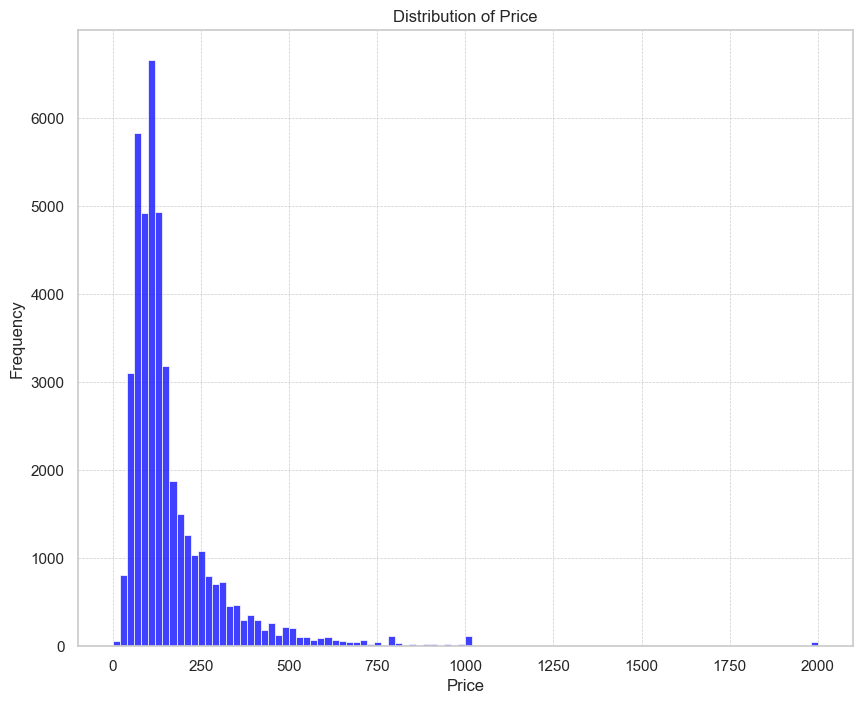

In [78]:
plt.figure(figsize = (10,8))
sns.histplot(x="price", data=df_combined, bins=100, color='blue')

# Adding labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### It looks like the price is normally distributed with a right skew with mean value around 180$ 

### We can also see there are units around whole number like $1000$, $2000$

In [32]:
# Lets look at the bathroom variable

df_combined["bathrooms_text"].unique()

array(['3 baths', '1.5 baths', '1 bath', '2 baths', '1 shared bath',
       '1 private bath', '1.5 shared baths', 'Half-bath', '0 baths',
       '2.5 baths', '4 baths', '5 baths', '2 shared baths', '3.5 baths',
       '3 shared baths', '4.5 baths', '5.5 baths', nan, '0 shared baths',
       '6.5 baths', 'Shared half-bath', '2.5 shared baths',
       '4.5 shared baths', '6 baths', 'Private half-bath',
       '4 shared baths', '3.5 shared baths', '8 baths', '8.5 baths',
       '7.5 baths'], dtype=object)

In [33]:
# We are going to create a new column bathroom_num by extracting from bathroom_text
df_combined['bathroom_num'] = df_combined['bathrooms_text'].str.extract(r'(\d+\.?\d?)').astype(float)

# Handle special cases
df_combined.loc[df_combined['bathroom_num'].isin(['Half-bath', 'Shared half-bath', 'Private half-bath']), 'bathroom_num'] = 0.5

# Handle NaN values if you want to fill with a specific value (e.g., 0)
df_combined['bathroom_num'].fillna(0, inplace=True)

In [34]:
# Check bathroom_num values 
df_combined['bathroom_num'].head()

0    3.0
1    1.5
2    1.0
3    1.0
4    1.0
Name: bathroom_num, dtype: float64

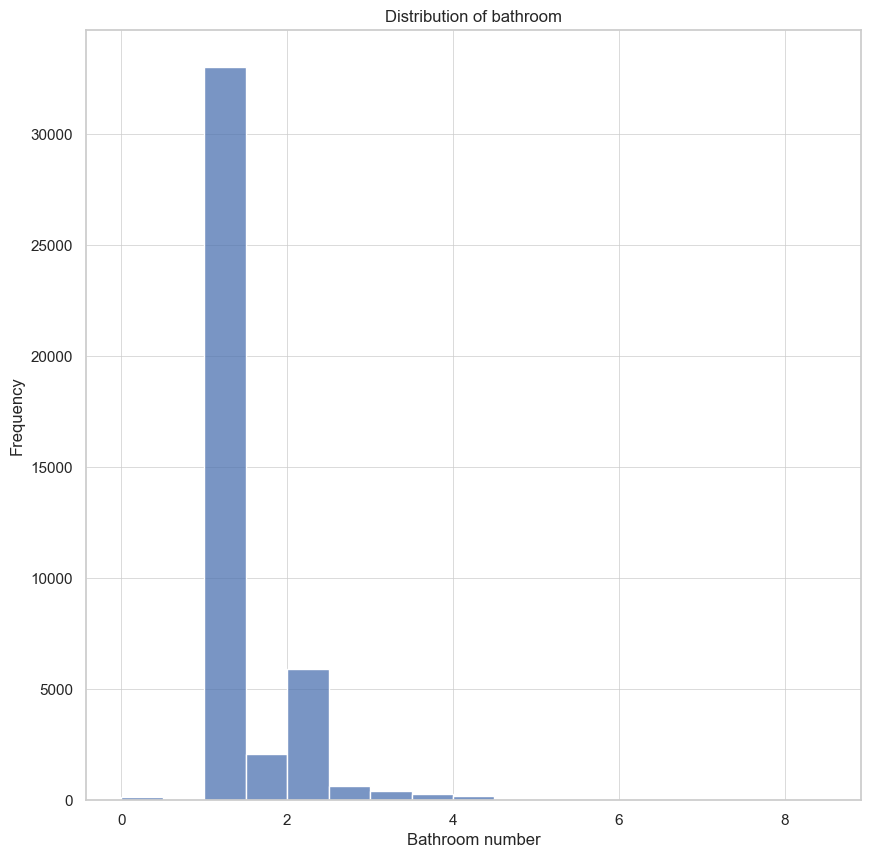

In [57]:
# Plot bathroom_num histogram to see distribution
plt.figure(figsize = (10,10))
sns.histplot(x = "bathroom_num", data = df_combined)
plt.xlabel("Bathroom number")
plt.ylabel("Frequency")
plt.title("Distribution of bathroom")
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.show()

Most units have either 1 or 1.5 bathrooms

In [36]:
# Extract only numeric columns 
numeric_columns_df = df_combined.select_dtypes(include=['int','float'])

In [37]:
# Checkout the df
numeric_columns_df.head()

id  host_id  host_listings_count  host_total_listings_count  latitude  \
0    1419     1565                  1.0                        1.0  43.64590   
1    8077    22795                  2.0                        3.0  43.64080   
2  387077   304551                  9.0                       16.0  43.66143   
3  864193  4534248                  1.0                        1.0  43.78345   
4   26654   113345                  5.0                       10.0  43.64608   

   longitude  accommodates  bedrooms  beds  price  ...  review_scores_checkin  \
0  -79.42423            10       5.0   7.0  469.0  ...                   5.00   
1  -79.37673             2       NaN   1.0  102.0  ...                   4.87   
2  -79.40883             1       NaN   1.0   60.0  ...                   4.33   
3  -79.44525             2       1.0   1.0   88.0  ...                    NaN   
4  -79.39032             4       1.0   2.0  338.0  ...                   4.63   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         5.00                    5.00                 5.00   
1                         4.90                    4.92                 4.83   
2                         4.67                    4.33                 4.67   
3                          NaN                     NaN                  NaN   
4                         4.76                    4.85                 4.66   

   calculated_host_listings_count  \
0                               1   
1                               2   
2                               7   
3                               1   
4                               4   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            1   
2                                            1   
3                                            0   
4                                            4   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             1   
2                                             6   
3                                             1   
4                                             0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                            0               0.07   
1                                            0               0.99   
2                                            0               0.02   
3                                            0                NaN   
4                                            0               0.27   

   bathroom_num  
0           3.0  
1           1.5  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 38 columns]

Text(0.5, 1.0, 'AirBnB features Correlation')

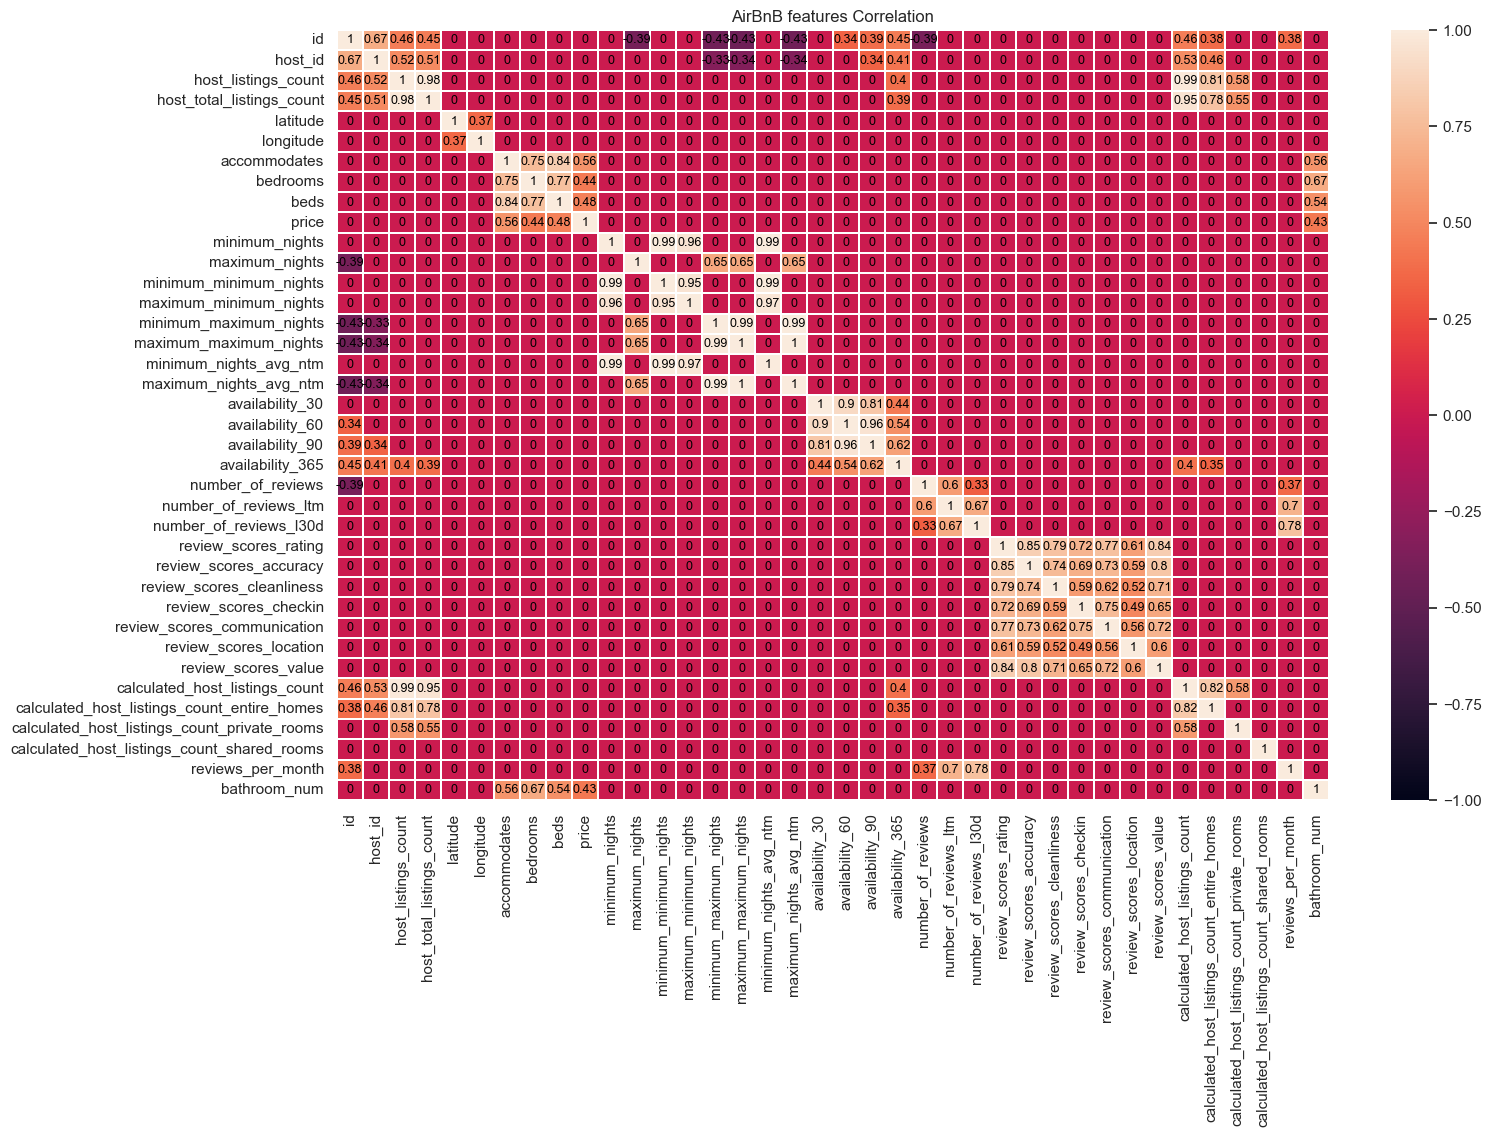

In [76]:
# Plot heatmap showing the correlation of all the features in the dataset

plt.figure( figsize = (16,10))
# Heatmap for all the remaining numerical data including the taget 'Price'
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = numeric_columns_df.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# plot the heatmap
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"},annot=True)
plt.title("AirBnB features Correlation")

### We want to look more into the relationships between price and highly correlated variables to see if there is a linear relationship

In [39]:
# Checkout the correlation of variables to price ( our terget variable)
corr =numeric_columns_df.corr()["price"].sort_values(ascending = False)[1:7] 
corr

accommodates        0.56
beds                0.48
bedrooms            0.44
bathroom_num        0.43
reviews_per_month   0.14
availability_30     0.13
Name: price, dtype: float64

In [40]:
# numeric columns info
numeric_columns_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42811 entries, 0 to 199639
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42811 non-null  int64  
 1   host_id                                       42811 non-null  int64  
 2   host_listings_count                           42809 non-null  float64
 3   host_total_listings_count                     42809 non-null  float64
 4   latitude                                      42811 non-null  float64
 5   longitude                                     42811 non-null  float64
 6   accommodates                                  42811 non-null  int64  
 7   bedrooms                                      31331 non-null  float64
 8   beds                                          42576 non-null  float64
 9   price                                         42811 non-null  flo

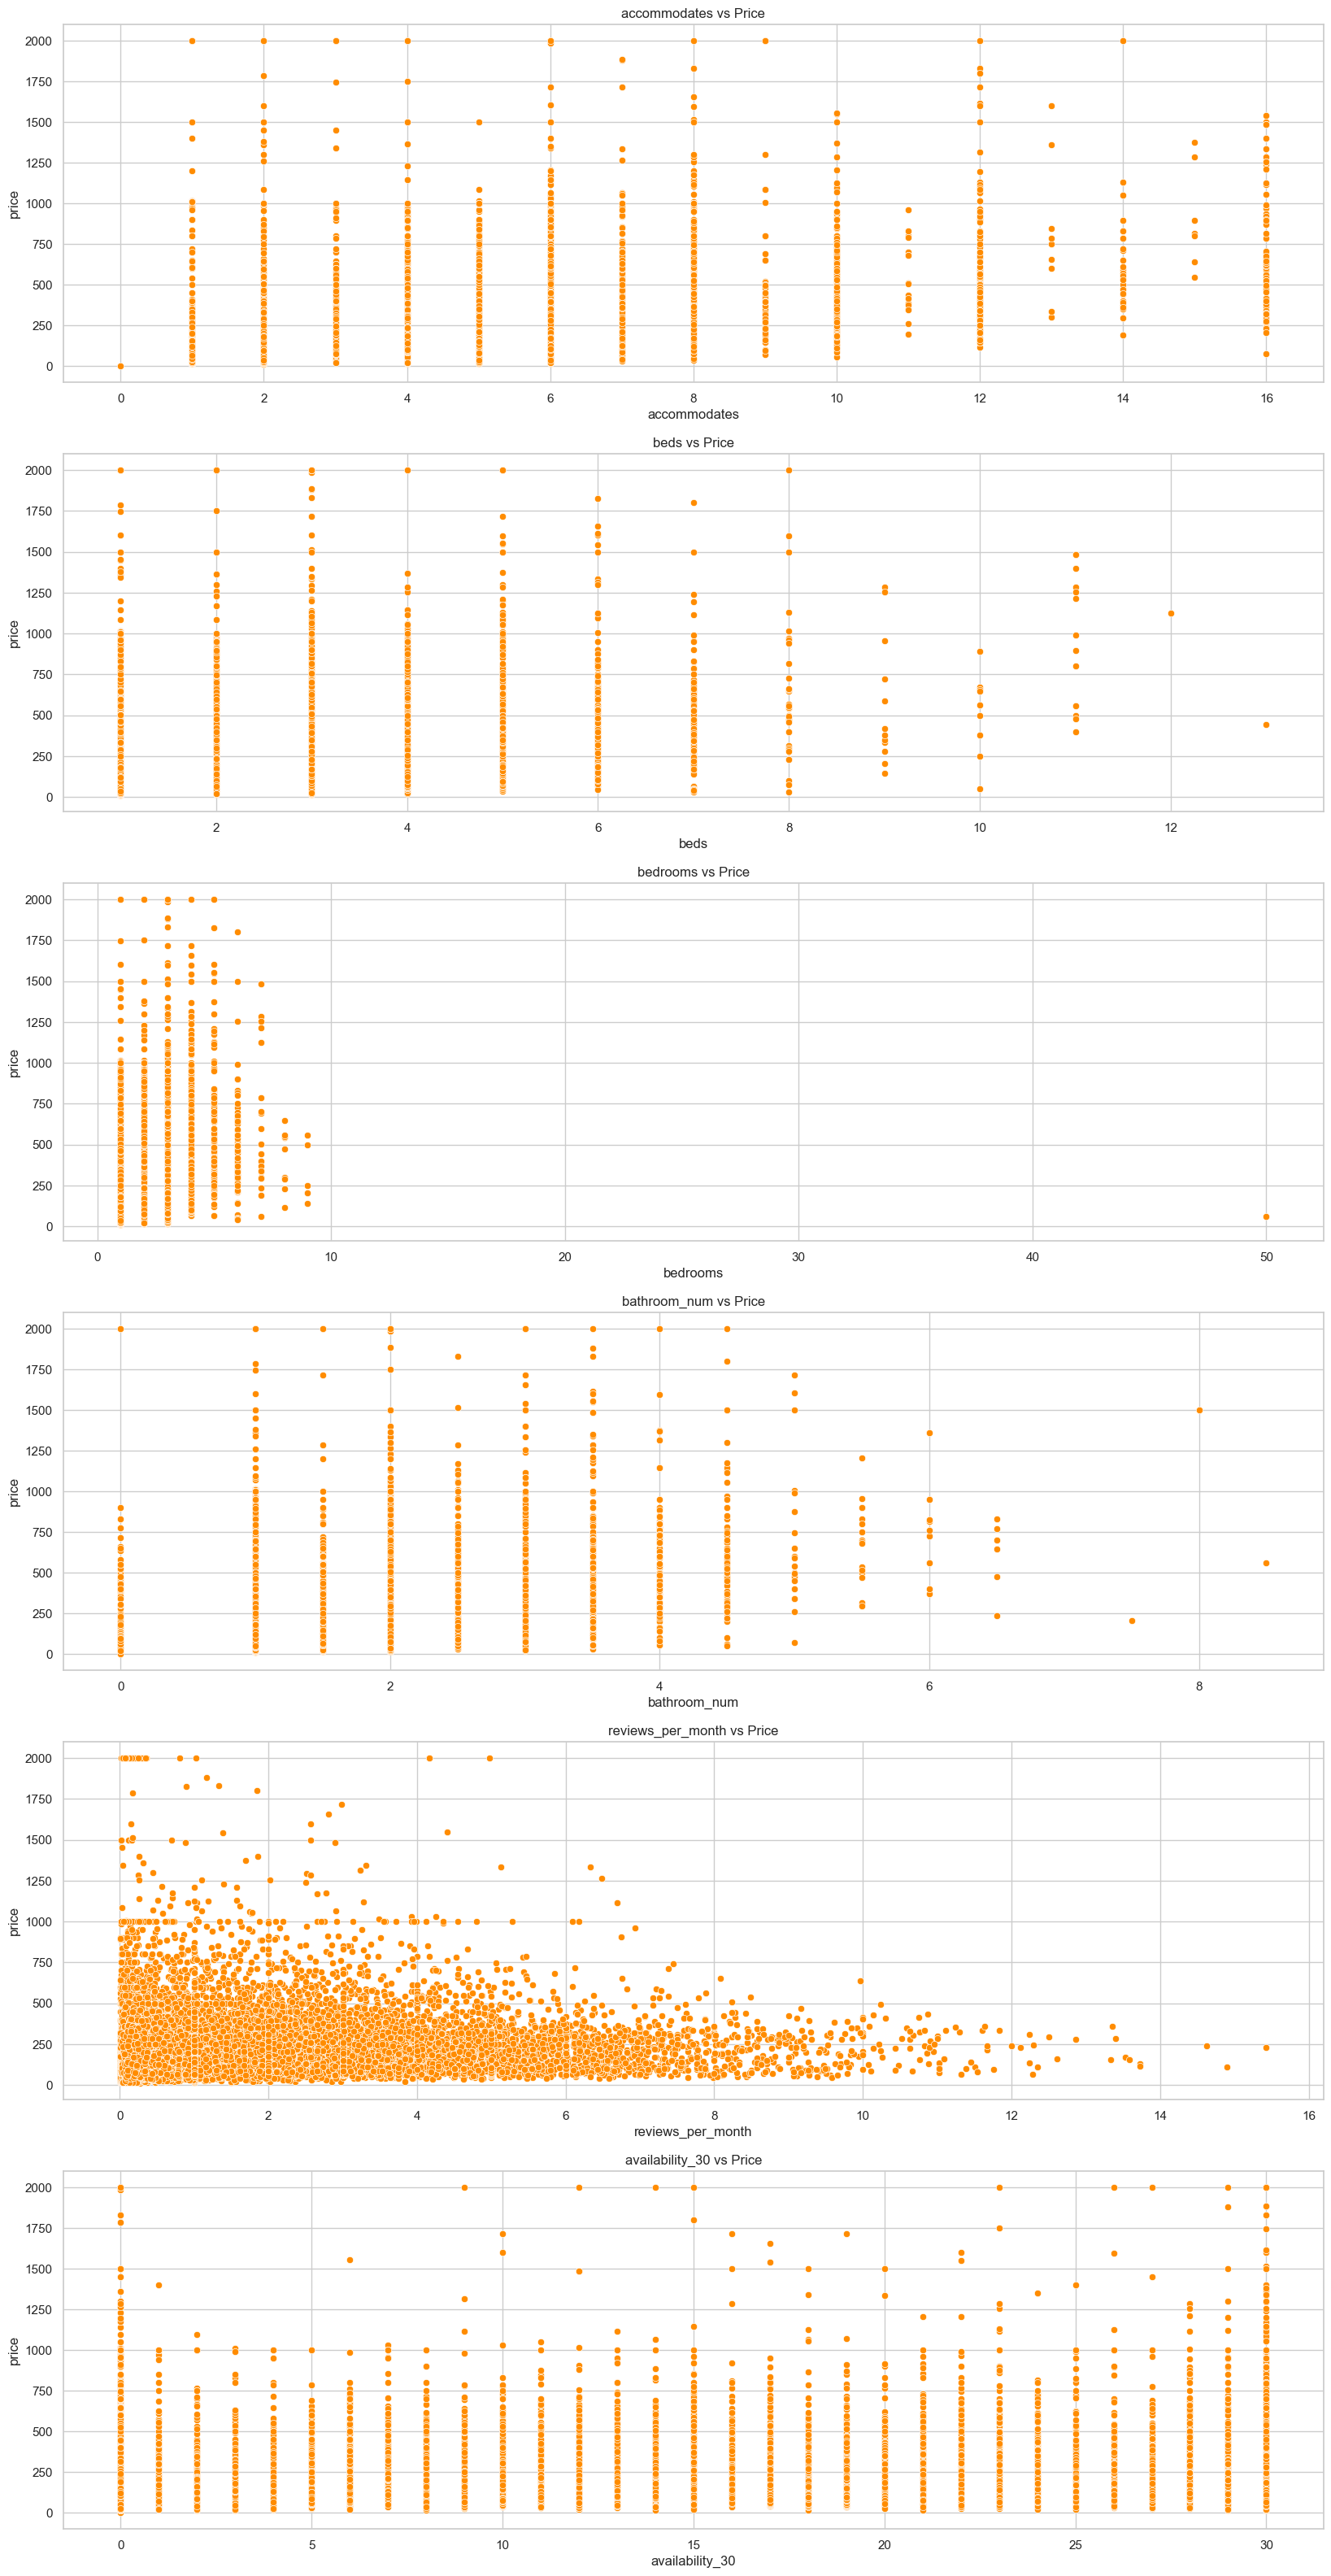

In [41]:
f,ax = plt.subplots(nrows = 6,ncols = 1, figsize = (20,40))
for i,col in enumerate(corr.index):    
    sns.scatterplot(x = col, y = "price", data = numeric_columns_df, ax = ax[i], color = 'darkorange')
    ax[i].set_title(f'{col} vs Price')

#### There is no linear relationship between the most correlated features and Price

### Checking out the different features to understand the data

In [42]:
# Highest correlated variable to Price
df_combined["accommodates"].describe()  # Basically how many person the unit accomodates, median is 2

count   42,811.00
mean         2.92
std          1.88
min          0.00
25%          2.00
50%          2.00
75%          4.00
max         16.00
Name: accommodates, dtype: float64

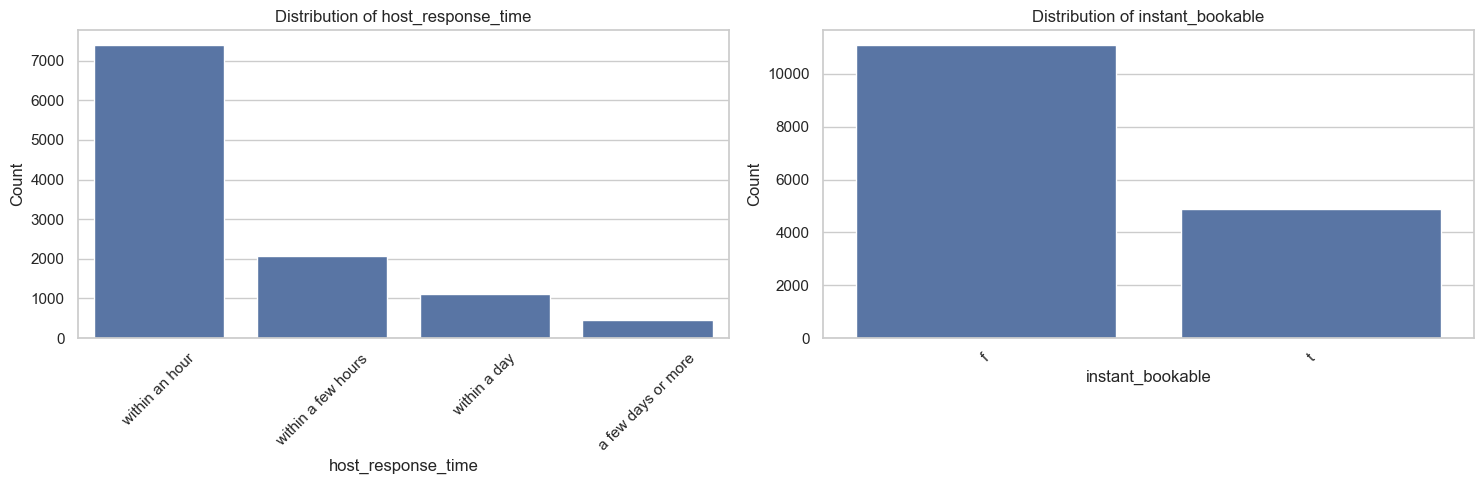

In [48]:
categorical_columns = ['host_response_time', 'instant_bookable']

# Plotting the distributions
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### We can see most hosts reply within an hour and most have instant bookable feature

Text(0.5, 1.0, 'Distribution of bedroom')

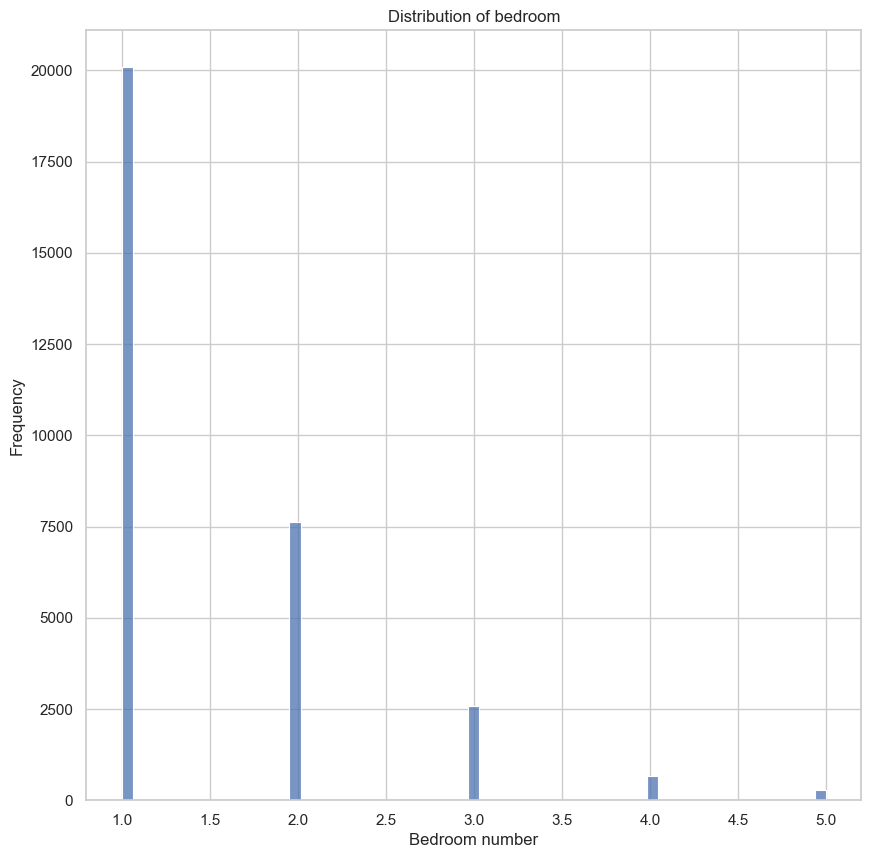

In [64]:
# plot bedroom distribution less that or equal to 5
plt.figure(figsize = (10,10))
sns.histplot(x = "bedrooms", data = df_combined[df_combined["bedrooms"]<=5])
plt.xlabel("Bedroom number")
plt.ylabel("Frequency")
plt.title("Distribution of bedroom")

#### Most units have 1 bedroom

In [71]:
### Check the mean prices for different bedrooms
df_combined.groupby("bedrooms")["price"].mean()

bedrooms
1.00    145.95
2.00    241.31
3.00    321.01
4.00    445.04
5.00    639.45
6.00    517.42
7.00    630.20
8.00    415.09
9.00    329.80
50.00    60.00
Name: price, dtype: float64

According to CP24.com
- Average one bedroom apartment in Toronto goes for 2600, per day rate assuming 30days in a month gives 87
- Average two bedroom apartment in Toronto goes for 3413, per day rate assuming 30days in a month gives 114


In [70]:
# 1 and 2 bedroom price/cost ratio

print(f" Mean Price/Cost ratio for 1bedroom unit is : {145.95/87}")
print(f" Mean Price/Cost ratio for 2bedroom unit is : {241.31/114}")

 Mean Price/Cost ratio for 1bedroom unit is : 1.6775862068965517
 Mean Price/Cost ratio for 2bedroom unit is : 2.1167543859649123


#### Assuming everything equal like occupancy, it is better for hosts to rent out 2bedroom apartment as they make 2X more than 1.67X for 1bedroom

In [79]:
# Plot longitude and latitude
fig = px.scatter_mapbox(df_combined, 
                        lat='latitude', 
                        lon='longitude', 
                        color='price',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, 
                        zoom=10, 
                        mapbox_style="carto-positron")

fig.show()

## Summary till now

We have different datatypes: 
    
  - Ordinal Categorical Columns: eg "Host_response_time" - We will deal with ordinal categorical values diffferently
    
  - Categorical Columns:  name, description, neighborhood_overview, host_name
    
  - Binary category: host_is_superhost, instant_bookable, has_availability
    
  - Numerical:
    
       - ID based: id, host_id
       - Listing details: latitude, longitude, accommodates, bathrooms, bedrooms
        
        


## Whats next?

#### Deal with null values

We will deal with null values by either imputing or dropping

#### Deal with outliers:

We will deal with outlier values by first checking if its part of the normal distribution if not drop

#### Deal with Nominal categorical values

We will deal with nominal categorical values by converting it to dummy variables

#### Deal with Ordinal categorical values

We will change if possible to some number order like (0,1,2,3)

#### Feature engineer columns

- We can deal with the reviews dataset using TD_IDF, word embedding techniques to find value 

- We can use 'host_since' column to derive 'host tenure' in years 


#### Baseline Model

We will train linear regression model as baseline model. 